## Python statistics essential training - 04_06_challenge

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
pop = pd.read_csv('grades.csv')

In [5]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


In [6]:
pop.shape

(100, 1)

<Axes: >

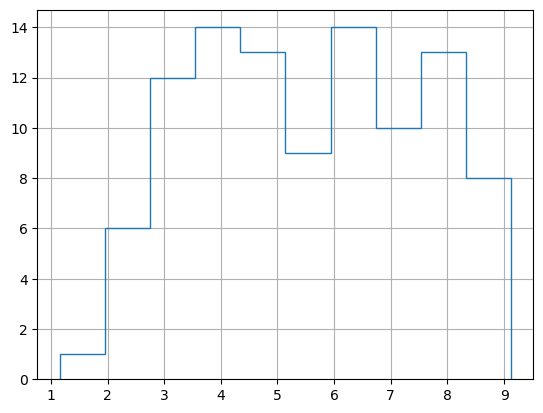

In [19]:
pop.grade.hist(histtype = 'step')

In [25]:
df = pd.DataFrame({'pass_fraction': [np.mean(pop.sample(100, replace = True).grade >= 5) for i in range(10000)]})
df.head()

,pass_fraction
0,0.56
1,0.55
2,0.52
3,0.64
4,0.53


In [26]:
def sample(data, n):
    return pd.DataFrame({'pass_fraction': [np.mean(data.sample(100, replace = True).grade >= 5) for i in range(n)]})

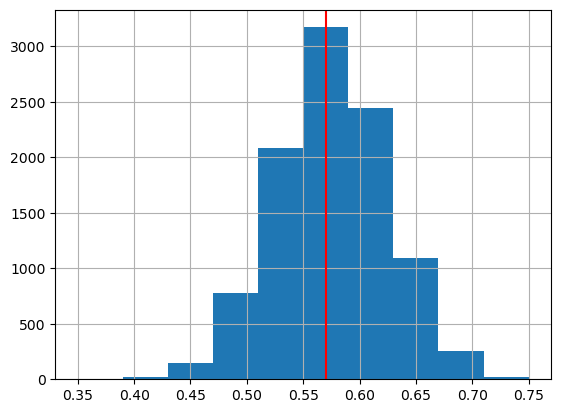

In [27]:
df.pass_fraction.hist()
pp.axvline(np.mean(pop.grade >= 5), c = 'r')
pp.show()

In [28]:
print(f'The 95% confidence interval for pass fraction is {df.pass_fraction.quantile(0.025)}, {df.pass_fraction.quantile(0.975)}')

The 95% confidence interval for pass fraction is 0.47, 0.67


In [31]:
np.mean(pop.grade > 5)

0.57

In [30]:
scipy.stats.percentileofscore(pop.grade, 5)

43.0

In [39]:
df2 = pd.DataFrame({'pass_percentile': [scipy.stats.percentileofscore(pop.sample(100, replace = True).grade, 5) for i in range(1000)]})
df2.head()

,pass_percentile
0,45.0
1,38.0
2,46.0
3,40.0
4,42.0


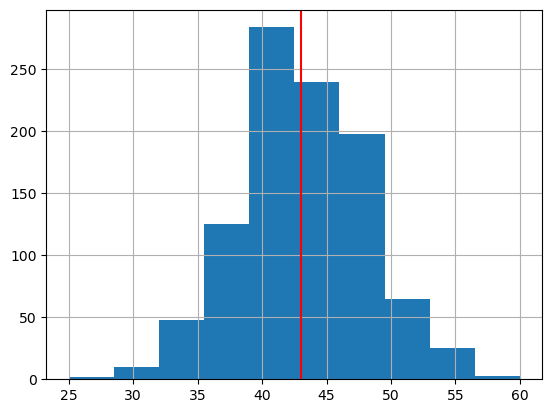

In [41]:
df2.pass_percentile.hist()
pp.axvline(scipy.stats.percentileofscore(pop.grade, 5), c = 'r')

In [42]:
print(f'The 95% confidence interval for pass percentile is {df2.pass_percentile.quantile(0.025)}, {df2.pass_percentile.quantile(0.975)}')

The 95% confidence interval for pass percentile is 33.0, 53.0
